# Heatmaps

Heatmaps are a way to visualize three-dimensions of data and to take advantage of spatial proximity of those dimensions.

In making revisions to this course I was really tempted to get rid of the section on heatmaps, as I've seen enough bad heatmaps to last me a lifetime. The problem is heatmaps are really quite powerful when you have the right data. Weather data is a great example. You have two dimensions, latitude and longitude, and then we can overlay on top of this a third dimension, say, temperature or rainfall amounts and use color to indicate its intensity.

In fact, anything with a two dimensional spatial aspect can make for a natural heat map. As an example, eye fixation points through gaze detection is used regularly by researchers and marketing experts to understand what people are looking at on websites. But where heatmaps break down is when there's no continuous - or at least ordinal - relationship between dimensions. Using a heatmap for categorical data, for instance, is just plain wrong. It misleads the viewer into looking for patterns and ordering through spatial proximity. And any such patterns would be purely spurious.

But I decided to keep this in the course, because it can be useful, and I've put together a new example using ordered data, so let's talk about the techniques. In matplotlib, a heatmap is simply a two-dimensional histogram where the x and the y values indicate potential points and the color plotted is the frequency of the observation.


In [1]:
# Let's bring in matplotlib and numpy, as well as pandas and some date time functionality
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from datetime import datetime

In [2]:
# In this example I want to show you some traffic data from New York City, which is
# all available from NYC open data portal.
df=pd.read_csv("../assets/NYC hourly traffic.csv")

# I'm going to convert the date column into a date and time
df["Date"]=df["Date"].apply(pd.to_datetime)

df.head()

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
0,21,2022-08-06,0,I,2820,649
1,21,2022-08-06,1,I,2124,474
2,21,2022-08-06,2,I,1617,391
3,21,2022-08-06,3,I,1228,358
4,21,2022-08-06,4,I,1604,368


In [3]:
# That might take a bit to load if you are following along on Coursera, it's a big 
# dataset. Let's pare it down in size and do some basic exploratory data analysis 
# with histograms. Let's say I'm interested in a single plaza (camera location) and 
# dates for the early part of 2017. I'm going to write a pandas query to do that
sample=df.query("`Plaza ID`==5 & Date>'2016-12-30' & Date<'2017-05-01'")
sample

,Plaza ID,Date,Hour,Direction,# Vehicles - E-ZPass,# Vehicles - VToll
735652,5,2017-04-29,0,I,216,25
735653,5,2017-04-29,0,O,100,23
735654,5,2017-04-29,1,I,111,21
735655,5,2017-04-29,1,O,53,18
735656,5,2017-04-29,2,I,72,16
...,...,...,...,...,...,...
773399,5,2016-12-31,21,O,234,54
773400,5,2016-12-31,22,I,180,46
773401,5,2016-12-31,22,O,177,40
773402,5,2016-12-31,23,I,126,30


This syntax might look a bit different to you from our first course. This is an alternative way to query a dataframe, and it uses a library called `numexpr` to take a query as a string and apply it to the dataframe. It's a bit like SQL in its syntax, if you are familiar with that, but it has a lot of caveats with it. I wanted to expose you to it so you were aware, but it's completely possible for you to use the regular boolean masking method I showed you in course 1. Now would be a great time to pause the video, open the notebook, and see if you could re-write this query using the knowledge you already have on boolean masking.

We have the hour of day here, so let's take a look at a histogram of activity over a day.

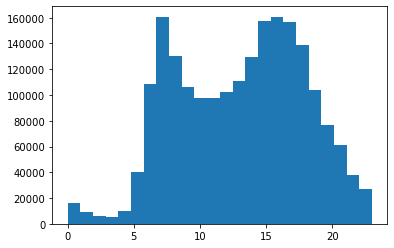

In [4]:
# since we have 24 hours in a day I'll set the bins there, and I want
# to see our frequency -- the weights for each bin -- as the number of
# vehicles which have the E-ZPass system. This system automatically bills
# drivers for using the road, and has already been aggregated (summed)
# for us from individual observations
plt.hist(sample["Hour"],bins=24,weights=sample["# Vehicles - E-ZPass"]);

Ok, what do you notice here? I see two spikes, mornings around 7:30 and afternoons starting at about 3 until 6. Sounds like rush hour!

In this example our hours are ordered, so it makes sense to view the data in this way. But we also have days of the week which are ordered. Let's extract the day of the week and look at a histogram of that.

/tmp/ipykernel_149/2117668974.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample["Day of Week"]=sample["Date"].dt.dayofweek


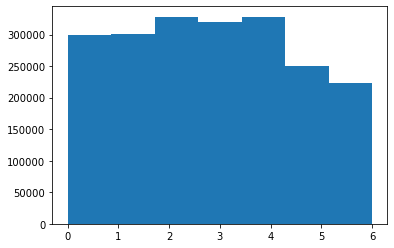

In [5]:
# We can extract the day of the week from the Date column using the
# pandas date time features. The Series object in pandas has an
# attribute "dt" which stores numerous date time transformations for
# us because it's such a common need. In this case we just take the
# Date column (which is a Series object) and get the .dt.dayofweek
# from it.
sample["Day of Week"]=sample["Date"].dt.dayofweek

# Once we have done that we can just look at a histogram
plt.hist(sample["Day of Week"],bins=7,weights=sample["# Vehicles - E-ZPass"]);

Ok, so we can see that traffic flow is pretty steady except for days 5 and 6 in the week, which happen to be the weekends. Now, we could isolate those days and look at the individual histograms for hourly traffic, but we can also look at a joint histogram -- or a heat map -- for both the hourly and daily variables. When we do this we set one variable to be the x axis, another to be the y axis, and then we render our frequency (our weights) as different colors showing the third dimension.

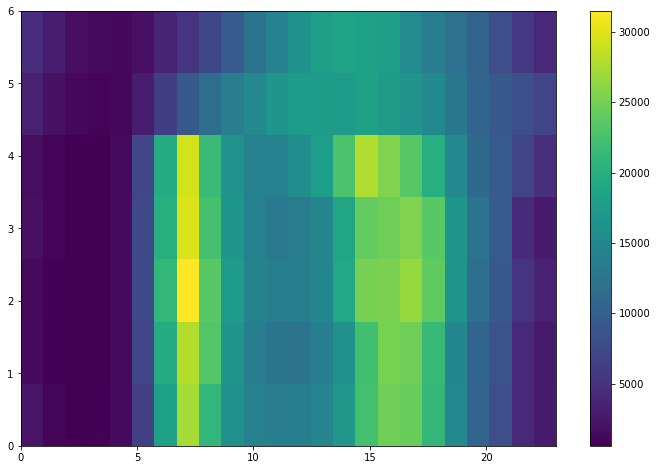

In [6]:
# While it sounds like a lot of work, it isn't really in matplotlib!
# The API looks almost the same as a regular histogram, but in this
# case we have to specify the bin size for each axis
plt.figure(figsize=(12,8)) # make a slightly bigger figure
plt.hist2d(sample["Hour"],
           sample["Day of Week"],
           bins=[24,7],
           weights=sample["# Vehicles - E-ZPass"])

# This next part is optional, but adds a legend telling you the value
# of each bin (cell) in the histogram
plt.colorbar();

Great! So lets disect this. First, we see that across all days (our y axis) the first four or so hours of the day are dark blue (this is the first four columns or so), indicating relatively little traffic. Then we see that for the days 0 through 4 we get a spike in traffic, shown as more yellow intensity cells in the image, but this isn't really true for the last two days of the week (the weekend - the top two rows).

Time data is an interesting case for using heat maps, because we often have cycles of activity within a time period -- in this case weeks -- and that allows us to have two ordered dimensions.

Now would be a good time for you to grab control and see if you could look at a different dimension -- months. Could you plot a heat map where one axis is months and the other is, say, week of the month?